In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

53.86463332263952 -4.9084353289946705
61.85649220917628 -94.32878712294188
-44.956754073459805 75.39193463825396
-38.01586000663889 67.63705623467402
81.22302668249606 -17.573409470163426
-3.7712826749797728 62.224213060275304
-52.348726530926434 -105.56014911264889
52.02729731528058 14.483229711266915
-82.02601392966287 33.96337075260112
-46.082386036847865 110.25327620864851
-82.98478040462055 91.59654665431458
41.66297474206144 -92.84226270577349
85.2983302257453 46.45614418411151
52.226423590537735 -33.419038591113974
-29.20969928240151 155.81924115158722
4.759055756110655 -132.86314249507666
-48.85802935487211 -66.3570050595695
-56.02216676548145 115.70855650193687
77.3428060137241 103.13465991269243
-49.587866146624876 59.307376016838504
33.16645874650611 -46.60018838887302
-18.814486704351694 110.58002198444194
39.08587825615615 -163.37038931621493
-52.8529082500465 5.409666761820887
-30.363494538552445 -4.112694733186828
78.02889246883936 156.55122212278565
6.604342242568663 32

-50.36918304767938 -10.836788483776786
5.831796302970673 -127.49834597004019
67.37205530405691 175.5959763158375
41.46441492013369 40.72592497381504
83.79303843154739 165.97768594623773
-22.945746418859983 -152.29529867849556
-79.05986005894938 -53.24258033971748
-0.0721171463248993 -58.96082963217812
-52.75940144785153 -176.87090015658623
76.89638750617792 -18.583802093133755
86.55423080894585 -71.96618249253744
-48.93613905764968 -150.4821562448811
53.50933607324171 -40.07985639778542
87.45650488549643 105.40742388885008
16.152830933090755 118.42889142467908
18.18491430569925 131.35686551714616
71.56926466433757 -24.912870720089728
79.17157863350192 -23.276168538084136
79.92084901490043 -72.68035287832113
53.99535188927476 -28.94190669282338
30.985026809406108 158.87879630088526
-83.97821039851833 -137.19644100644814
42.895881400332655 29.514157417419085
-8.941716940825145 -144.193481323968
9.844553984980308 -152.68803113715052
2.7917059365997545 -87.66726853710001
42.45681037961364 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=e1970d345de4eb55df235e08cdba2809


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | llangefni
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | souillac
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | eisenhuttenstadt
City not found. Skipping...
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | grinnell
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | byron bay
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | comodoro rivadavia
Processing Record 18 of Set 1 | khatanga
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 o

Processing Record 38 of Set 4 | angoche
Processing Record 39 of Set 4 | panaba
Processing Record 40 of Set 4 | pran buri
Processing Record 41 of Set 4 | berezovyy
Processing Record 42 of Set 4 | chara
Processing Record 43 of Set 4 | alexandria
Processing Record 44 of Set 4 | poum
Processing Record 45 of Set 4 | zdvinsk
Processing Record 46 of Set 4 | kanigoro
Processing Record 47 of Set 4 | rincon
Processing Record 48 of Set 4 | ferrol
Processing Record 49 of Set 4 | pokhara
Processing Record 50 of Set 4 | oktyabrskiy
Processing Record 1 of Set 5 | agutaya
Processing Record 2 of Set 5 | airai
Processing Record 3 of Set 5 | marcona
City not found. Skipping...
Processing Record 4 of Set 5 | anloga
Processing Record 5 of Set 5 | de aar
Processing Record 6 of Set 5 | arrecife
Processing Record 7 of Set 5 | lavrentiya
Processing Record 8 of Set 5 | lethem
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | hasaki
Processing Record 11 of Set 5 

Processing Record 26 of Set 8 | santa cruz
Processing Record 27 of Set 8 | baruun-urt
Processing Record 28 of Set 8 | ostrovnoy
Processing Record 29 of Set 8 | mae hong son
Processing Record 30 of Set 8 | nome
Processing Record 31 of Set 8 | faya
Processing Record 32 of Set 8 | vung tau
Processing Record 33 of Set 8 | haskovo
Processing Record 34 of Set 8 | kholtoson
Processing Record 35 of Set 8 | atasu
Processing Record 36 of Set 8 | chabahar
Processing Record 37 of Set 8 | guerrero negro
Processing Record 38 of Set 8 | kamenka
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | ijaki
City not found. Skipping...
Processing Record 41 of Set 8 | chamonix-mont-blanc
Processing Record 42 of Set 8 | jensen beach
Processing Record 43 of Set 8 | bargal
City not found. Skipping...
Processing Record 44 of Set 8 | krasnoselkup
Processing Record 45 of Set 8 | iquitos
Processing Record 46 of Set 8 | bismarck
Processing Record 47 of Set 8 | teknaf
Processing Record 48 of Set 8 | 

Processing Record 15 of Set 12 | new iberia
Processing Record 16 of Set 12 | altamira
Processing Record 17 of Set 12 | chegdomyn
Processing Record 18 of Set 12 | miri
Processing Record 19 of Set 12 | talnakh
Processing Record 20 of Set 12 | niquelandia
Processing Record 21 of Set 12 | bathsheba
Processing Record 22 of Set 12 | enshi
Processing Record 23 of Set 12 | balkhash
Processing Record 24 of Set 12 | natividad
Processing Record 25 of Set 12 | taoudenni
Processing Record 26 of Set 12 | stephenville
Processing Record 27 of Set 12 | dukat
Processing Record 28 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 29 of Set 12 | whitianga
Processing Record 30 of Set 12 | susanville
Processing Record 31 of Set 12 | tazovskiy
Processing Record 32 of Set 12 | yuanping
Processing Record 33 of Set 12 | kasongo-lunda
Processing Record 34 of Set 12 | ballina
Processing Record 35 of Set 12 | balimo
City not found. Skipping...
Processing Record 36 of Set 12 | surovik

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Llangefni,53.2556,-4.3106,64.26,81,100,8.05,GB,2022-05-15 21:03:44
1,Thompson,55.7435,-97.8558,35.17,97,100,11.25,CA,2022-05-15 21:03:44
2,Mahebourg,-20.4081,57.7000,72.25,82,66,7.83,MU,2022-05-15 21:01:35
3,Souillac,-20.5167,57.5167,74.37,84,89,7.85,MU,2022-05-15 21:03:45
4,Victoria,22.2855,114.1577,69.33,86,100,11.01,HK,2022-05-15 21:02:57
5,Castro,-24.7911,-50.0119,56.55,95,25,5.30,BR,2022-05-15 21:01:39
6,Port Elizabeth,-33.9180,25.5701,62.89,97,0,6.91,ZA,2022-05-15 20:57:51
7,Busselton,-33.6500,115.3333,51.80,82,5,6.78,AU,2022-05-15 20:59:06
8,Albany,42.6001,-73.9662,77.40,90,35,5.17,US,2022-05-15 21:00:13
9,Grinnell,41.7430,-92.7224,73.26,49,100,5.75,US,2022-05-15 21:03:46


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Llangefni,GB,2022-05-15 21:03:44,53.2556,-4.3106,64.26,81,100,8.05
1,Thompson,CA,2022-05-15 21:03:44,55.7435,-97.8558,35.17,97,100,11.25
2,Mahebourg,MU,2022-05-15 21:01:35,-20.4081,57.7000,72.25,82,66,7.83
3,Souillac,MU,2022-05-15 21:03:45,-20.5167,57.5167,74.37,84,89,7.85
4,Victoria,HK,2022-05-15 21:02:57,22.2855,114.1577,69.33,86,100,11.01
5,Castro,BR,2022-05-15 21:01:39,-24.7911,-50.0119,56.55,95,25,5.30
6,Port Elizabeth,ZA,2022-05-15 20:57:51,-33.9180,25.5701,62.89,97,0,6.91
7,Busselton,AU,2022-05-15 20:59:06,-33.6500,115.3333,51.80,82,5,6.78
8,Albany,US,2022-05-15 21:00:13,42.6001,-73.9662,77.40,90,35,5.17
9,Grinnell,US,2022-05-15 21:03:46,41.7430,-92.7224,73.26,49,100,5.75


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

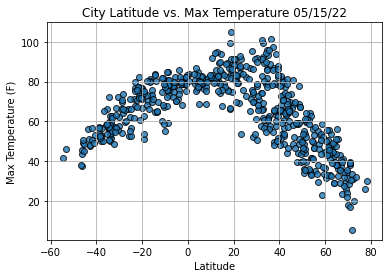

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

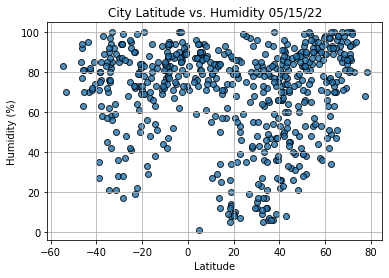

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

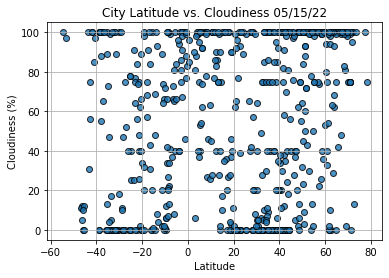

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

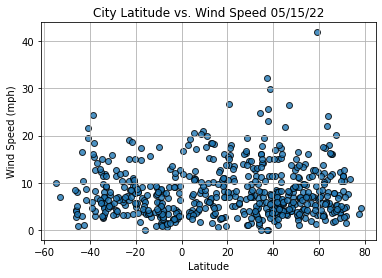

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City           Comodoro Rivadavia
Country                        AR
Date          2022-05-15 21:03:47
Lat                      -45.8667
Lng                         -67.5
Max Temp                    49.26
Humidity                       63
Cloudiness                      0
Wind Speed                   7.94
Name: 13, dtype: object

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Llangefni,GB,2022-05-15 21:03:44,53.2556,-4.3106,64.26,81,100,8.05
1,Thompson,CA,2022-05-15 21:03:44,55.7435,-97.8558,35.17,97,100,11.25
4,Victoria,HK,2022-05-15 21:02:57,22.2855,114.1577,69.33,86,100,11.01
8,Albany,US,2022-05-15 21:00:13,42.6001,-73.9662,77.40,90,35,5.17
9,Grinnell,US,2022-05-15 21:03:46,41.7430,-92.7224,73.26,49,100,5.75


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

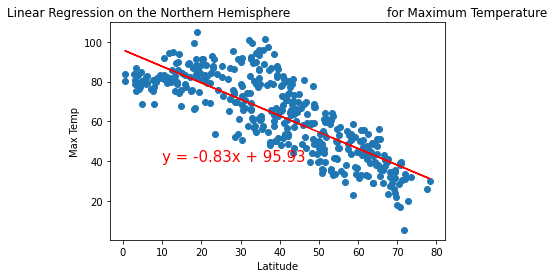

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

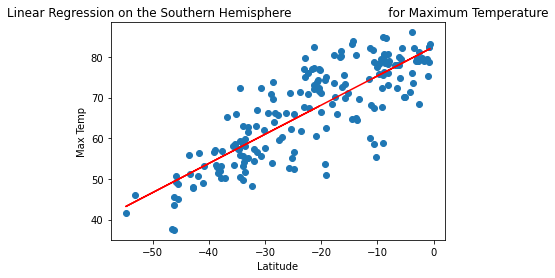

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

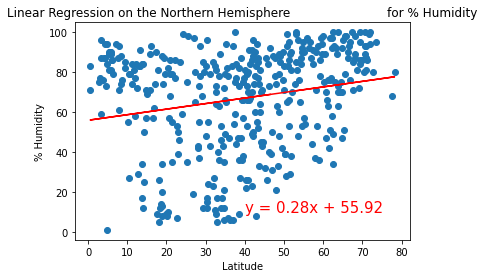

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

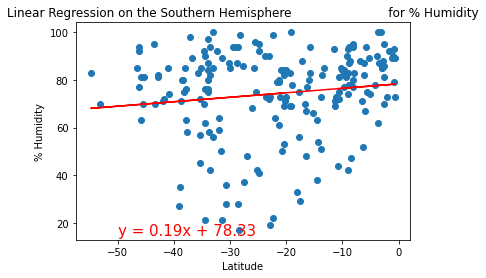

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

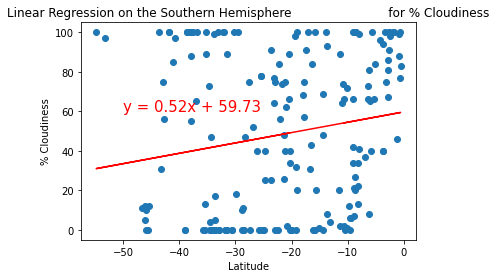

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

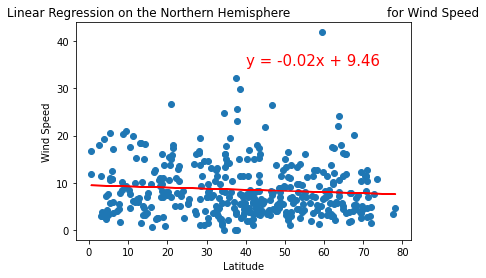

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

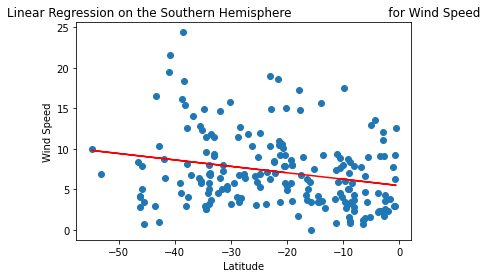

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))